<a href="https://colab.research.google.com/github/bhaskarayh/Image-Classification-7-Cats/blob/main/%5BFIX%5D_Image_Classification_7_kucing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing TensorFlow Lite models

This notebooks shows some ways for debugging TensorFlow Lite models and comparing them with the original implementations in TensorFlow.

For more details, take a look at blog posts:

- [Testing TensorFlow Lite image classification model](https://thinkmobile.dev/testing-tensorflow-lite-image-classification-model/) - converting TensorFlow to TensorFlow Lite and comparing models side by side.
- [Automate testing of TensorFlow Lite model implementation](https://thinkmobile.dev/automate-testing-of-tensorflow-lite-model-implementation/) - Testing TensorFlow Lite model on Android app with Espresso and instrumented tests.

### How accurate is this notebook?

It's worth to mention, that this notebook shows just some basic ideas for eye-comparison between TensorFlow and TensorFlow Lite models. It doesn't check them for speed and any other factor of performance and doesn't do any accurate side-by-side comparison. But still can be helpful with answering the question "why a model implemented on the app doesn't work the same like on notebook?".

## TensorFlow 2.0 and Colaboratory

This notebook can be executed in Colaboratory. It requires some changes to make it working on Docker environment described in linked blog post.

Examples presented in this notebook are built on top of TensorFlow 2.0 stable version.

### GPU support
The good thing about Colab is that it supports GPU envinronment without additional work. Just open **Runtime -> Change runtime type** and make sure that GPU is selected. The training process of this notebook should be about 3 times faster than on CPU env.

# **Import & Install Library**

In [ ]:
#Install library Tensorflow-GPU versi 2.0.0 dan Tensorflow_Hub
!pip install tensorflow-gpu==2.0.0
!pip install tensorflow_hub

     |████████████████████████████████| 380.8MB 20kB/s 
     |████████████████████████████████| 3.8MB 42.1MB/s 
     |████████████████████████████████| 450kB 45.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=0e2dd908b84080f9ca1493d5c6da96a7fc3e9acea556e212f01277f9bdd3ac93
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tens

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt #Library visualisasi
import tensorflow as tf #Library Tensorflow 
import tensorflow_hub as hub #Library Tensorflow Hub
import numpy as np #Library untuk mengubah gambar menjadi array

Menggunakan library Pandas untuk mendapatkan visualisasi yang lebih baik

In [ ]:
import pandas as pd

# Menaikkan presisi dari data yang ditampilkan untuk 
# perbandingan secara bersebelahan yang lebih baik
pd.set_option("display.precision", 8)

In [ ]:
# Mengetahui versi library dan hardware yang digunakan
print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.0.0
Hub version:  0.8.0
Eager mode:  True
GPU is available


### Menyiapkan dataset

In [ ]:
# Install library Google Drive untuk Python
!pip install PyDrive

In [ ]:
# Import library Google Drive untuk Python
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Meminta izin akun google drive yang ingin diakses
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Mendownload link google drive berisi dataset ke files colab

# ID File yang ingin diakses
downloaded = drive.CreateFile({'id':"1FZ1OJyeopXzm8abA42M5UUyaXo4_r-O4"}) 

# Nama file berupa folder yang ingin dibuat menjadi folder zip
downloaded.GetContentFile('kucing.zip')        

**Kucing 6 jenis**

https://drive.google.com/open?id=1WWGGykwREgCwLAEG8U41R6SSJRWjzwG8



**Kucing 8 jenis**
https://drive.google.com/file/d/1ssaUjx1q3WheaIHgwEQCfUkLhTZ1aypC/view?usp=sharing



**Kucing Other 7 Jenis***
https://drive.google.com/file/d/1FZ1OJyeopXzm8abA42M5UUyaXo4_r-O4/view?usp=sharing

In [ ]:
# Mengekstrak folder zip yang telah di import
!unzip kucing.zip

Archive:  kucing.zip
   creating: Kucing/
   creating: Kucing/Anggora/
  inflating: Kucing/Anggora/photo_0.jpg  
  inflating: Kucing/Anggora/photo_1.jpg  
  inflating: Kucing/Anggora/photo_10.jpg  
  inflating: Kucing/Anggora/photo_100.jpg  
  inflating: Kucing/Anggora/photo_101.jpg  
  inflating: Kucing/Anggora/photo_103.jpg  
  inflating: Kucing/Anggora/photo_104.jpg  
  inflating: Kucing/Anggora/photo_105.jpg  
  inflating: Kucing/Anggora/photo_106.jpg  
  inflating: Kucing/Anggora/photo_107.jpg  
  inflating: Kucing/Anggora/photo_108.jpg  
  inflating: Kucing/Anggora/photo_109.jpg  
  inflating: Kucing/Anggora/photo_11.jpg  
  inflating: Kucing/Anggora/photo_110.jpg  
  inflating: Kucing/Anggora/photo_111.jpg  
  inflating: Kucing/Anggora/photo_112.jpg  
  inflating: Kucing/Anggora/photo_114.jpg  
  inflating: Kucing/Anggora/photo_115.jpg  
  inflating: Kucing/Anggora/photo_116.jpg  
  inflating: Kucing/Anggora/photo_117.jpg  
  inflating: Kucing/Anggora/photo_118.jpg  
  inflating

In [ ]:
# Import library visualisasi
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Import library untuk mengakses files colab 
import pathlib

# Seleksi folder dataset
data_dir = 'Kucing' 
data_dir = pathlib.Path(data_dir) 

In [ ]:
# Menghitung jumlah dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

1438

In [ ]:
# Membuat data generator untuk train dan validasi
# Membagi data train dan validasi dengan perbandingan 80% : 20%

IMAGE_SHAPE = (224, 224) # Ukuran gambar
TRAINING_DATA_DIR = str(data_dir) # Direktori dataset

# Pembagian untuk validasi
datagen_kwargs = dict(rescale=1./255, validation_split=.20) 
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

# Pembagian untuk training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 285 images belonging to 8 classes.
Found 1153 images belonging to 8 classes.


In [ ]:
# Mempelajari tentang kumpulan data train
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

# Hasil berupa 32 image batch dengan ukuran 224x224x3
# dan 32 label batch sebanyak 8 buah label

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 8)


In [ ]:
# Mempelajari label-label pada dataset
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Anggora' 'Balinese' 'Bombay' 'European Shorthair' 'Nebelung' 'Other'
 'Sphynx' 'Toyger']


### Model architecture, training

As a base model for transfer learning, we'll use MobileNet v2 model stored on TensorFlow Hub. Presented model can be used only in TensorFlow 2.0 implementation (TF Hub contains also models for TensorFlow 1.x).

Basic information about feature vector:
- Input shape: 224x224x3 (224x224 pixels, 3 chanels each, RGB format),
- Each channel has value in range [0, 1],
- Feature vector output shape: 1280 (number of labels classified by MobileNet is 1001 - this info isn't important here)

For more details check feature vector page:
https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4

In [ ]:
# Menggunakan model vektor MobileNet v2 untuk training
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  10248     
Total params: 2,268,232
Trainable params: 10,248
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:
# Menjalankan model training
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=20, # jumlah maksimal epoch yang akan di eksekusi
    verbose=1,
    steps_per_epoch=steps_per_epoch, # berapa batch yang akan dieksekusi pada setiap epoch
    validation_data=valid_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=val_steps_per_epoch).history # mencatat hasil training

Train for 37.0 steps, validate for 9.0 steps
Epoch 1/20
37/37 [==============================] - 15s 394ms/step - loss: 1.3776 - acc: 0.5265 - val_loss: 0.6242 - val_acc: 0.8526
Epoch 2/20
37/37 [==============================] - 4s 98ms/step - loss: 0.5001 - acc: 0.8586 - val_loss: 0.3912 - val_acc: 0.9053
Epoch 3/20
37/37 [==============================] - 4s 97ms/step - loss: 0.3112 - acc: 0.9193 - val_loss: 0.3393 - val_acc: 0.9088
Epoch 4/20
37/37 [==============================] - 4s 97ms/step - loss: 0.2501 - acc: 0.9315 - val_loss: 0.3017 - val_acc: 0.9228
Epoch 5/20
37/37 [==============================] - 4s 97ms/step - loss: 0.2194 - acc: 0.9332 - val_loss: 0.2713 - val_acc: 0.9474
Epoch 6/20
37/37 [==============================] - 4s 97ms/step - loss: 0.1709 - acc: 0.9558 - val_loss: 0.2608 - val_acc: 0.9404
Epoch 7/20
37/37 [==============================] - 4s 97ms/step - loss: 0.1484 - acc: 0.9644 - val_loss: 0.2530 - val_acc: 0.9404
Epoch 8/20
37/37 [==================

In [ ]:
# Menghitung accuracy dan loss setelah training
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)

9/9 [==============================] - 1s 88ms/step - loss: 0.2212 - acc: 0.9509


In [ ]:
# Menampilkan hasil loss dan accuracy akhir
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 0.22
Final accuracy: 95.09%


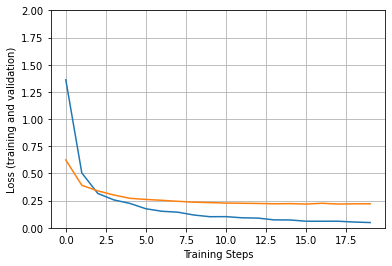

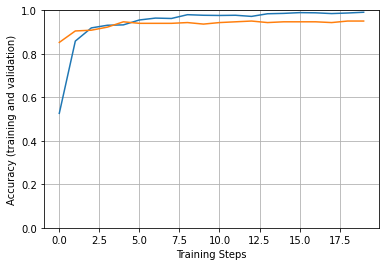

In [ ]:
# Memvisualisasikan proses training
# dalam bentuk grafik

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.grid()
plt.show()

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

plt.grid()
plt.show()

### Export your model

We'll save our model as TensorFlow SavedModel format. After that we'll do inference on reloaded model, so if you come with a model already trained, it'll be easier to inspect it.

In [ ]:
# Mengexport model yang sudah ditrain menjadi format Tensorflow SavedModel 
KUCING_SAVED_MODEL = "saved_models/kucing8"
tf.saved_model.save(model, KUCING_SAVED_MODEL)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: saved_models/kucing8/assets


INFO:tensorflow:Assets written to: saved_models/kucing8/assets


## Load TensorFlow SavedModel

Let's load TensorFlow model from SavedModel format. Because we used custom layer from TensorFlow Hub, we need to explicitly point out the implementation with `custom_obiects` param.

## Memuat TensorFlow SavedModel

In [ ]:
# Memuat SavedModel

kucing_model = hub.load(KUCING_SAVED_MODEL)
print(kucing_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f1e3e44b390>


### Cek prediksi dari model yang dimuat

In [ ]:
# Mengambil kumpulan gambar dan label dari validation dataset generator

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


Validation batch shape tells us that we have a batch of 32 images, with size and channels: 224x224x3.

Let's calculate predictions for the entire batch.

In [ ]:

tf_model_predictions = kucing_model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 8)


In [ ]:
# Mengkonversi hasil prediksi ke Pandas dataframe untuk visualisasi yang lebih baik

tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Anggora,Balinese,Bombay,European Shorthair,Nebelung,Other,Sphynx,Toyger
0,0.00001123,0.00311558,0.53219175,0.00406703,0.45932540,0.00001478,0.00107464,0.00019961
1,0.00000125,0.00019557,0.00165914,0.00054061,0.00045359,0.00052782,0.99148291,0.00513905
2,0.00003086,0.00001374,0.99975103,0.00000709,0.00007850,0.00000041,0.00009914,0.00001915
3,0.00000290,0.00000268,0.00004253,0.00014733,0.00000637,0.00007140,0.00037709,0.99934977
4,0.00000513,0.00001856,0.00006937,0.00001310,0.00000633,0.00000327,0.99947709,0.00040710


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

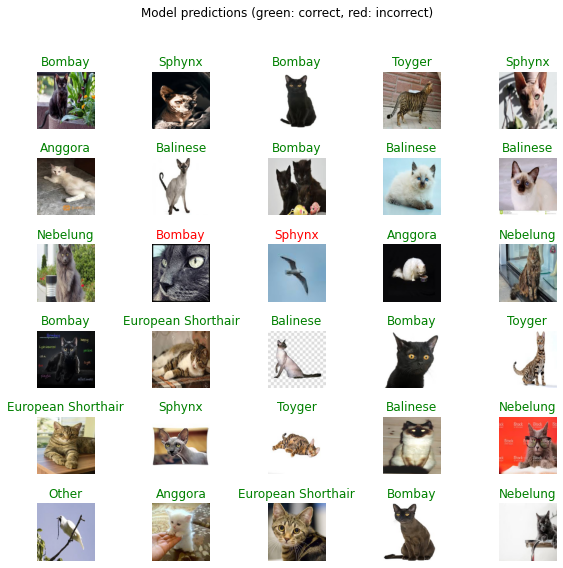

In [ ]:
# Menampilkan hasil prediksi berupa kumpulan gambar dan label

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

# Label berwarna hijau = prediksi benar, merah = prediksi salah

## Convert model to TFLite

Convert recently loaded model to TensorFlow Lite models (standard and quantized with a [post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization)).

Because of TensorFlow 2.0 nature, we'll need to convert TensorFlow model into concrete function and then do conversion to TFLite. More about it [here](https://www.tensorflow.org/lite/r2/convert/concrete_function).

## Konversi model ke TFLite

In [ ]:
# Membuat folder tflite_models
!mkdir "tflite_models"

In [ ]:
# Membuat direktori dan file untuk model TFLite dan TFLite Quant
TFLITE_MODEL = "tflite_models/kucing-8.tflite"
TFLITE_QUANT_MODEL = "tflite_models/kucing_quant-8.tflite"

In [ ]:
# Mendapatkan fungsi concrete dari model Keras
run_model = tf.function(lambda x : kucing_model(x))

# Menyimpan fungsi concrete
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

# Konversi model ke versi quantized dengan post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)

print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 11M
-rw-r--r-- 1 root root 8.6M May 27 13:14 kucing-8.tflite
-rw-r--r-- 1 root root 2.3M May 27 13:14 kucing_quant-8.tflite


# **Unduh File TFLite**

In [ ]:
# Melihat list file yang tersedia
!ls

adc.json  Kucing  kucing.zip  sample_data  saved_models  tflite_models


In [ ]:
# Mengkompres folder menjadi zip
!zip -r /content/hasil_training_7kucing+other.zip /content/tflite_models

  adding: content/tflite_models/ (stored 0%)
  adding: content/tflite_models/kucing-8.tflite (deflated 7%)
  adding: content/tflite_models/kucing_quant-8.tflite (deflated 24%)


In [ ]:
# Mengunduh zip 
from google.colab import files
files.download("/content/hasil_training_7kucing+other.zip")

=============================================================

### Load TFLite model

Load TensorFlow lite model with interpreter interface.

In [ ]:
# Memuat model TFLite yang sudah dibuat untuk melihat detail input/output

tflite_interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [1 8]
type: <class 'numpy.float32'>


#### Resize input and output tensors shapes

Input shape of loaded TFLite model is 1x224x224x3, what means that we can make predictions for single image.

Let's resize input and output tensors, so we can make predictions for batch of 32 images.

In [ ]:
tflite_interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [ 32 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [32  8]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter.invoke()

tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

Prediction results shape: (32, 8)


In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
tflite_pred_dataframe.columns = dataset_labels

print("TFLite prediction results for the first elements")
tflite_pred_dataframe.head()

TFLite prediction results for the first elements


,Anggora,Balinese,Bombay,European Shorthair,Nebelung,Other,Sphynx,Toyger
0,0.00001123,0.00311559,0.53219116,0.00406702,0.45932600,0.00001478,0.00107464,0.00019961
1,0.00000125,0.00019557,0.00165910,0.00054060,0.00045359,0.00052780,0.99148315,0.00513901
2,0.00003086,0.00001374,0.99975103,0.00000709,0.00007850,0.00000041,0.00009914,0.00001915
3,0.00000290,0.00000268,0.00004253,0.00014734,0.00000637,0.00007140,0.00037709,0.99934965
4,0.00000513,0.00001856,0.00006937,0.00001310,0.00000633,0.00000327,0.99947721,0.00040710


Now let's do the same for TFLite quantized model:
- Load model,
- Reshape input to handle batch of images,
- Run prediction

In [ ]:
# Load quantized TFLite model
tflite_interpreter_quant = tf.lite.Interpreter(model_path=TFLITE_QUANT_MODEL)

# Learn about its input and output details
input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

# Resize input and output tensors to handle batch of 32 images
tflite_interpreter_quant.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
tflite_interpreter_quant.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter_quant.allocate_tensors()

input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

# Run inference
tflite_interpreter_quant.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter_quant.invoke()

tflite_q_model_predictions = tflite_interpreter_quant.get_tensor(output_details[0]['index'])
print("\nPrediction results shape:", tflite_q_model_predictions.shape)

== Input details ==
name: x
shape: [ 32 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [32  8]
type: <class 'numpy.float32'>

Prediction results shape: (32, 8)


In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

tflite_q_pred_dataframe = pd.DataFrame(tflite_q_model_predictions)
tflite_q_pred_dataframe.columns = dataset_labels

print("Quantized TFLite model prediction results for the first elements")
tflite_q_pred_dataframe.head()

Quantized TFLite model prediction results for the first elements


,Anggora,Balinese,Bombay,European Shorthair,Nebelung,Other,Sphynx,Toyger
0,0.00000230,0.00002652,0.03972895,0.00297630,0.95720917,0.00000118,0.00002962,0.00002595
1,0.00032560,0.00019097,0.00165021,0.00297291,0.02899764,0.60399687,0.35922357,0.00264229
2,0.00003068,0.00003592,0.99895906,0.00008498,0.00010297,0.00000151,0.00021587,0.00056897
3,0.00000619,0.00000401,0.00015628,0.00018372,0.00010648,0.00001193,0.00060767,0.99892360
4,0.00007071,0.00024885,0.00067404,0.00038406,0.00002986,0.00006343,0.99839264,0.00013639


## Compare prediction results

Now we will use Pandas to visualize results from all 3 models and find differences between them.

In [ ]:
# Concatenate results from all models

all_models_dataframe = pd.concat([tf_pred_dataframe, 
                                  tflite_pred_dataframe, 
                                  tflite_q_pred_dataframe], 
                                 keys=['TF Model', 'TFLite', 'TFLite quantized'],
                                 axis='columns')
all_models_dataframe.head()

TF Model                          ... TFLite quantized                        
      Anggora    Balinese      Bombay  ...            Other      Sphynx      Toyger
0  0.00001123  0.00311558  0.53219175  ...       0.00000118  0.00002962  0.00002595
1  0.00000125  0.00019557  0.00165914  ...       0.60399687  0.35922357  0.00264229
2  0.00003086  0.00001374  0.99975103  ...       0.00000151  0.00021587  0.00056897
3  0.00000290  0.00000268  0.00004253  ...       0.00001193  0.00060767  0.99892360
4  0.00000513  0.00001856  0.00006937  ...       0.00006343  0.99839264  0.00013639

[5 rows x 24 columns]

In [ ]:
# Swap columns to hava side by side comparison

all_models_dataframe = all_models_dataframe.swaplevel(axis='columns')[tflite_pred_dataframe.columns]
all_models_dataframe.head()

Anggora              ...      Toyger                 
     TF Model      TFLite  ...      TFLite TFLite quantized
0  0.00001123  0.00001123  ...  0.00019961       0.00002595
1  0.00000125  0.00000125  ...  0.00513901       0.00264229
2  0.00003086  0.00003086  ...  0.00001915       0.00056897
3  0.00000290  0.00000290  ...  0.99934965       0.99892360
4  0.00000513  0.00000513  ...  0.00040710       0.00013639

[5 rows x 24 columns]

In [ ]:
# Highlight TFLite models predictions that are different from original model

def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('TF Model', axis='columns', level=-1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

all_models_dataframe.style.apply(highlight_diff, axis=None)

As we can see, in most cases predictions are different between all models, usually by small factors. High-confidence predictions between TensorFlow and TensorFlow Lite models are very close to each other (in some cases there are even similar).  
Quantized model outstands the most, but this is the cost of optimizations (model weights 3-4 times less).

To make prediction results even more readable, let's simplify dataframes, to show only the highest-score prediction and the corresponding label.

In [ ]:
# Concatenation of argmax and max value for each row
def max_values_only(data):
  argmax_col = np.argmax(data, axis=1).reshape(-1, 1)
  max_col = np.max(data, axis=1).reshape(-1, 1)
  return np.concatenate([argmax_col, max_col], axis=1)

# Build simplified prediction tables
tf_model_pred_simplified = max_values_only(tf_model_predictions)
tflite_model_pred_simplified = max_values_only(tflite_model_predictions)
tflite_q_model_pred_simplified = max_values_only(tflite_q_model_predictions)

In [ ]:
# Build DataFrames and present example
columns_names = ["Label_id", "Confidence"]
tf_model_simple_dataframe = pd.DataFrame(tf_model_pred_simplified)
tf_model_simple_dataframe.columns = columns_names

tflite_model_simple_dataframe = pd.DataFrame(tflite_model_pred_simplified)
tflite_model_simple_dataframe.columns = columns_names

tflite_q_model_simple_dataframe = pd.DataFrame(tflite_q_model_pred_simplified)
tflite_q_model_simple_dataframe.columns = columns_names

tf_model_simple_dataframe.head()

,Label_id,Confidence
0,2.0,0.53219175
1,6.0,0.99148291
2,2.0,0.99975103
3,7.0,0.99934977
4,6.0,0.99947709


In [ ]:
# Concatenate results from all models
all_models_simple_dataframe = pd.concat([tf_model_simple_dataframe, 
                                         tflite_model_simple_dataframe, 
                                         tflite_q_model_simple_dataframe], 
                                        keys=['TF Model', 'TFLite', 'TFLite quantized'],
                                        axis='columns')

# Swap columns for side-by-side comparison
all_models_simple_dataframe = all_models_simple_dataframe.swaplevel(axis='columns')[tf_model_simple_dataframe.columns]

# Highlight differences
all_models_simple_dataframe.style.apply(highlight_diff, axis=None)

## Visualize predictions from TFLite models

At the end let's visualize predictions from TensorFlow Lite and quantized TensorFlow Lite models.

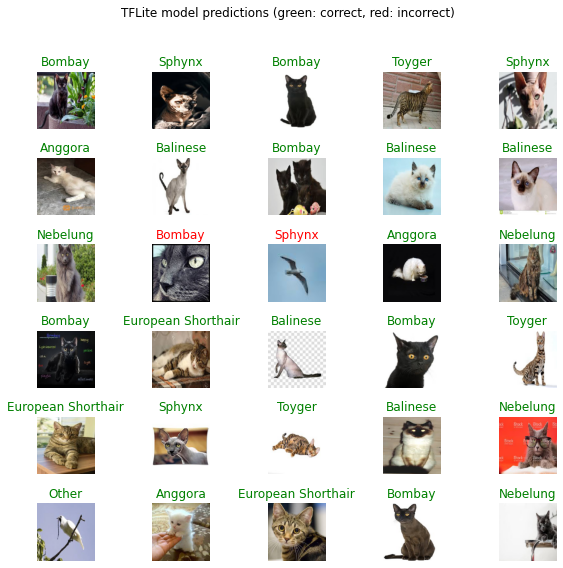

In [ ]:
# Print images batch and labels predictions for TFLite Model

tflite_predicted_ids = np.argmax(tflite_model_predictions, axis=-1)
tflite_predicted_labels = dataset_labels[tflite_predicted_ids]
tflite_label_id = np.argmax(val_label_batch, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if tflite_predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(tflite_predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("TFLite model predictions (green: correct, red: incorrect)")

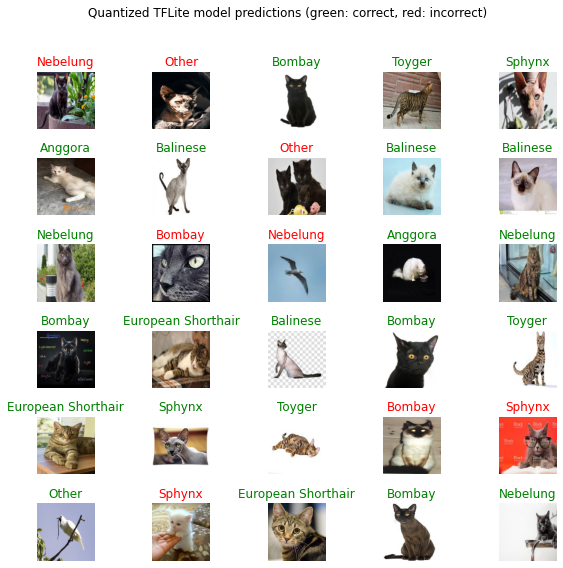

In [ ]:
# Print images batch and labels predictions for TFLite Model

tflite_q_predicted_ids = np.argmax(tflite_q_model_predictions, axis=-1)
tflite_q_predicted_labels = dataset_labels[tflite_q_predicted_ids]
tflite_q_label_id = np.argmax(val_label_batch, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if tflite_q_predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(tflite_q_predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Quantized TFLite model predictions (green: correct, red: incorrect)")

## Export image validation batch

Export validation batch so it can be tested client side. Below we create compressed file containing all images named with the convention:

`n{}_true{}_pred{}.jpg`

where the first number is index, the second - true label index, the third - value predicted by TFLite moder generated in this notebook. Example file will look similar to this: `n0_true1_pred1.jpg`.

All images then will be put into client side testing code (res/assets in Android tests). Integration tests will run inference process on each image and then compare results with the ones saved in file names.

In [ ]:
from PIL import Image

In [ ]:
VAL_BATCH_DIR = "validation_batch"

In [ ]:
!mkdir {VAL_BATCH_DIR}

In [ ]:
# Export batch to *.jpg files with specific naming convention.
# Make sure they are exported in the full quality, otherwise the inference
# process will return different results. 

for n in range(32):
  filename = "n{:0.0f}_true{:0.0f}_pred{:0.0f}.jpg".format(
      n,
      true_label_ids[n],
      tflite_model_pred_simplified[n][0]
  )
  img_arr = np.copy(val_image_batch[n])
  img_arr *= 255
  img_arr = img_arr.astype("uint8")
  img11 = Image.fromarray(img_arr, 'RGB')
  img11.save("{}/{}".format(VAL_BATCH_DIR, filename), "JPEG", quality=100)

In [ ]:
!tar -zcvf {VAL_BATCH_DIR}.tar.gz {VAL_BATCH_DIR}

validation_batch/
validation_batch/n21_true0_pred0.jpg
validation_batch/n31_true3_pred1.jpg
validation_batch/n29_true5_pred5.jpg
validation_batch/n23_true5_pred5.jpg
validation_batch/n22_true5_pred5.jpg
validation_batch/n5_true3_pred2.jpg
validation_batch/n12_true3_pred3.jpg
validation_batch/n15_true5_pred5.jpg
validation_batch/n17_true2_pred2.jpg
validation_batch/n9_true4_pred4.jpg
validation_batch/n1_true4_pred4.jpg
validation_batch/n14_true4_pred3.jpg
validation_batch/n3_true5_pred5.jpg
validation_batch/n19_true4_pred4.jpg
validation_batch/n16_true4_pred4.jpg
validation_batch/n24_true2_pred3.jpg
validation_batch/n10_true4_pred4.jpg
validation_batch/n18_true4_pred4.jpg
validation_batch/n0_true1_pred1.jpg
validation_batch/n2_true0_pred0.jpg
validation_batch/n4_true4_pred4.jpg
validation_batch/n13_true4_pred3.jpg
validation_batch/n6_true4_pred4.jpg
validation_batch/n30_true0_pred0.jpg
validation_batch/n11_true5_pred5.jpg
validation_batch/n20_true5_pred5.jpg
validation_batch/n8_true3_pr

File `validation_batch.tar.gz` is ready to be downloaded, unpacked and put into client-side testing code.

In [ ]:
model.export(export_dir='.')

AttributeError: ignored